In [3]:
import numpy as np
import xarray as xr
import sys
sys.path.insert(0,"/home/mtissot/SpinUp/jumper/lib")
import matplotlib.pyplot as plt
import densite
import restart

import importlib
importlib.reload(restart)

<module 'restart' from '/home/mtissot/SpinUp/jumper/lib/restart.py'>

# **Load files**

In [2]:
#Should be calculated in the update_e3tm function
# TO DO :
# Diff densité beaucoup negative qu'avant
# justifier continents e3tm
# AEC GUIGUI

### 1.1 - Predictions

In [3]:
zos_new,so_new,thetao_new  = restart.load_predictions()

print(np.shape(zos_new))
print(np.shape(so_new))
print(np.shape(thetao_new))

(1, 331, 360)
(1, 75, 331, 360)
(1, 75, 331, 360)


### 1.2 - Maskdataset

In [4]:
MASKdataset    = xr.open_dataset('/thredds/idris/work/ues27zx/eORCA1.4.2_mesh_mask_modJD.nc',decode_times=False) 
print("features : ", list(MASKdataset.keys()))

features :  ['e1f', 'e1t', 'e1u', 'e1v', 'e2f', 'e2t', 'e2u', 'e2v', 'e3f_0', 'e3t_0', 'e3t_1d', 'e3u_0', 'e3uw_0', 'e3v_0', 'e3vw_0', 'e3w_0', 'e3w_1d', 'ff_f', 'ff_t', 'fmask', 'gdept_0', 'gdept_1d', 'gdepw_0', 'gdepw_1d', 'glamf', 'glamt', 'glamu', 'glamv', 'gphif', 'gphit', 'gphiu', 'gphiv', 'mbathy', 'misf', 'nav_lev', 'time_counter', 'tmask', 'tmaskutil', 'umask', 'umaskutil', 'vmask', 'vmaskutil', 'gridx', 'gridy']


### 1.3 - Restart file

In [5]:
#SUPER SUPER LONG, PEUT ETRE LE FAIRE EN BASH OU ERREUR
restarts_file = "/thredds/idris/work/ues27zx/Restarts/"
term          = "19141231"
#restart_names = restart.getRestartFiles(restarts_file,term)

In [6]:
restarts_file = "/thredds/idris/work/ues27zx/Restarts/"
restart_name  = "OCE_CM65v420-LR-CdL-pi-01_19141231_restart_0142.nc"  #pour chaque fichier de restart 
Restart       = xr.open_dataset(restarts_file+restart_name,decode_times=False)

x_slice,y_slice = restart.getXYslice(Restart)

print("x slice  : ",x_slice)
print("y slice  : ",y_slice)
print("\nfeatures : ", list(Restart.keys()))

ssh2 = zos_new[-1:,y_slice,x_slice]
thetao2 = thetao_new[-1:,:,y_slice,x_slice]
so2 = so_new[-1:,:,y_slice,x_slice]

x slice  :  slice(38, 57, None)
y slice  :  slice(154, 168, None)

features :  ['xx', 'yy', 'kt', 'ndastp', 'adatrj', 'ntime', 'fwfisf_par_b', 'isf_hc_par_b', 'isf_sc_par_b', 'nn_fsbc', 'ssu_m', 'ssv_m', 'sst_m', 'sss_m', 'ssh_m', 'e3t_m', 'frq_m', 'rnf_b', 'rnf_hc_b', 'rnf_sc_b', 'utau_b', 'vtau_b', 'qns_b', 'emp_b', 'sfx_b', 'en', 'avt_k', 'avm_k', 'dissl', 'ub2_b', 'vb2_b', 'un_bf', 'vn_bf', 'sbc_hc_b', 'sbc_sc_b', 'qsr_hc_b', 'fraqsr_1lev', 'frc_v', 'frc_t', 'frc_s', 'surf_ini', 'ssh_ini', 'e3t_ini', 'tmask_ini', 'hc_loc_ini', 'sc_loc_ini', 'rdt', 'sshb', 'ub', 'vb', 'tb', 'sb', 'sshn', 'un', 'vn', 'tn', 'sn', 'rhop']


# **Update one restart file**

### 2.1 - zos, so and Thetao update

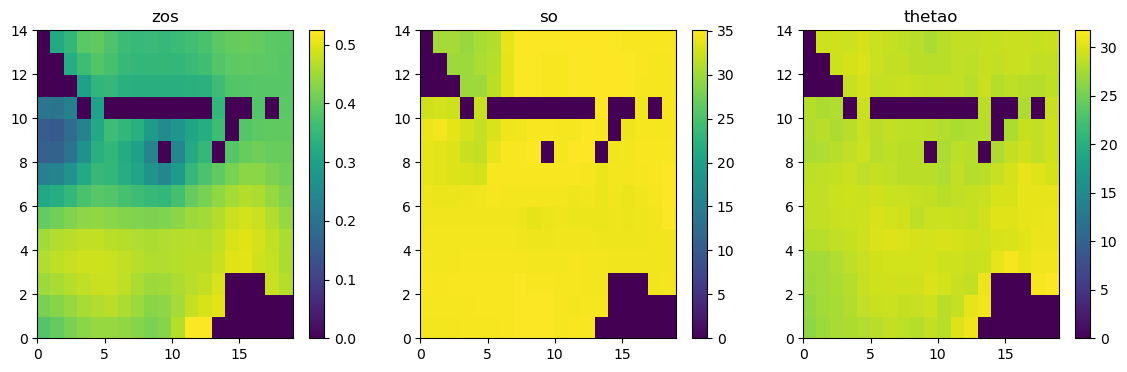

In [7]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
a = axes[0].pcolor(Restart["sshn"][0])
axes[0].set_title('zos')
fig.colorbar(a, ax=axes[0])
a = axes[1].pcolor(Restart["sn"][0,0])
axes[1].set_title('so')
fig.colorbar(a, ax=axes[1])
a = axes[2].pcolor(Restart["tn"][0,0])
axes[2].set_title('thetao')
fig.colorbar(a, ax=axes[2])

In [8]:
restart.update_pred(Restart,zos_new,so_new,thetao_new)

print("sn shape    : ",np.shape(Restart["sn"]))
print("tn shape    : ",np.shape(Restart["tn"]))
print("sshn shape  : ",np.shape(Restart["sshn"]))
print("sss_m shape : ",np.shape(Restart["sss_m"]))
print("sss_t shape : ",np.shape(Restart["sst_m"]))

sn shape    :  (1, 75, 14, 19)
tn shape    :  (1, 75, 14, 19)
sshn shape  :  (1, 14, 19)
sss_m shape :  (1, 14, 19)
sss_t shape :  (1, 14, 19)


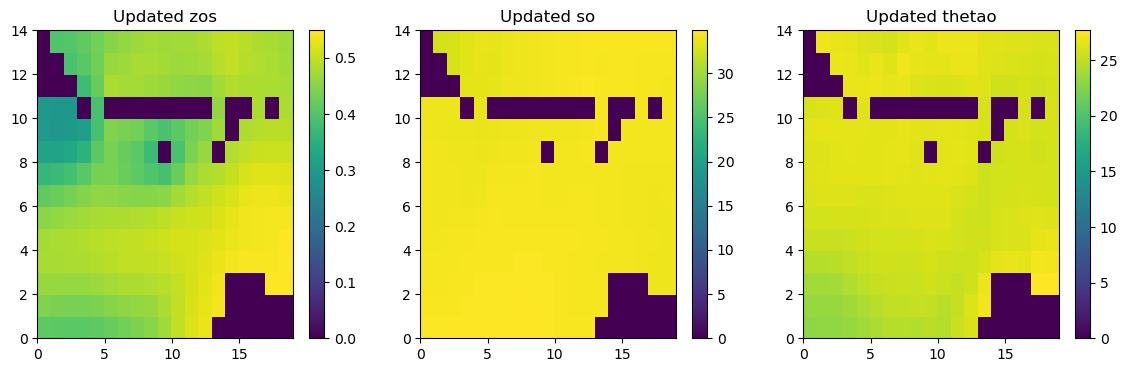

In [9]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
a = axes[0].pcolor(Restart["sshn"][0])
axes[0].set_title('Updated zos')
fig.colorbar(a, ax=axes[0]);
a = axes[1].pcolor(Restart["sn"][0,0])
axes[1].set_title('Updated so')
fig.colorbar(a, ax=axes[1]);
a = axes[2].pcolor(Restart["tn"][0,0])
axes[2].set_title('Updated thetao')
fig.colorbar(a, ax=axes[2]);

### 2.2 - e3t 

Text(0.5, 1.0, 'e3t_m')

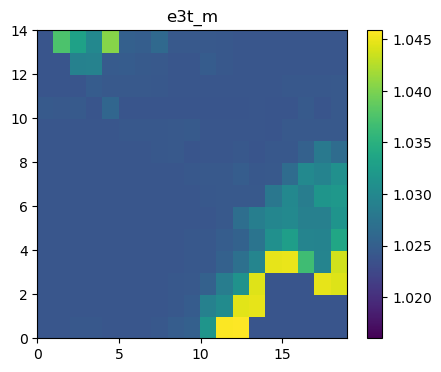

In [10]:
fig = plt.figure(figsize=(5,4))
plt.pcolor(Restart["e3t_m"][0],vmin=1.016)
plt.colorbar()
plt.title("e3t_m")
#x=Restart["e3t_m"][0,0]

In [11]:
e3t_new = restart.update_e3tm(Restart,MASKdataset)

print("e3_m shape   : ",np.shape(Restart["e3t_m"]))
print("e3t shape    : ",np.shape(e3t_new))

e3_m shape   :  (1, 14, 19)
e3t shape    :  (1, 75, 14, 19)


Text(0.5, 1.0, 'Updated e3t_m')

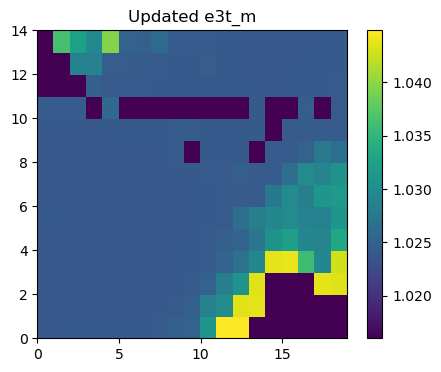

In [13]:
fig = plt.figure(figsize=(5,4))
plt.pcolor(Restart["e3t_m"][0], vmin=1.016)
plt.colorbar()
plt.title("Updated e3t_m")

### 2.3 - rhop update

In [14]:
deptht_new = restart.get_deptht(Restart,MASKdataset)
print("deptht shape : ",np.shape(deptht_new))

deptht shape :  (1, 75, 14, 19)


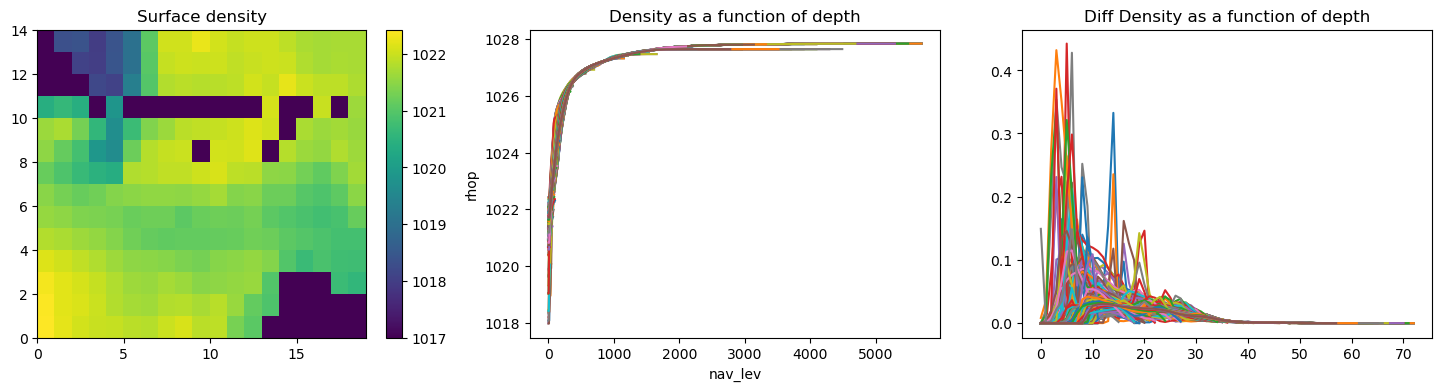

In [15]:
restart.plot_density_infos(Restart,e3t_new,min_=1017)

In [16]:
restart.update_rhop(Restart,MASKdataset,deptht_new)

updated density


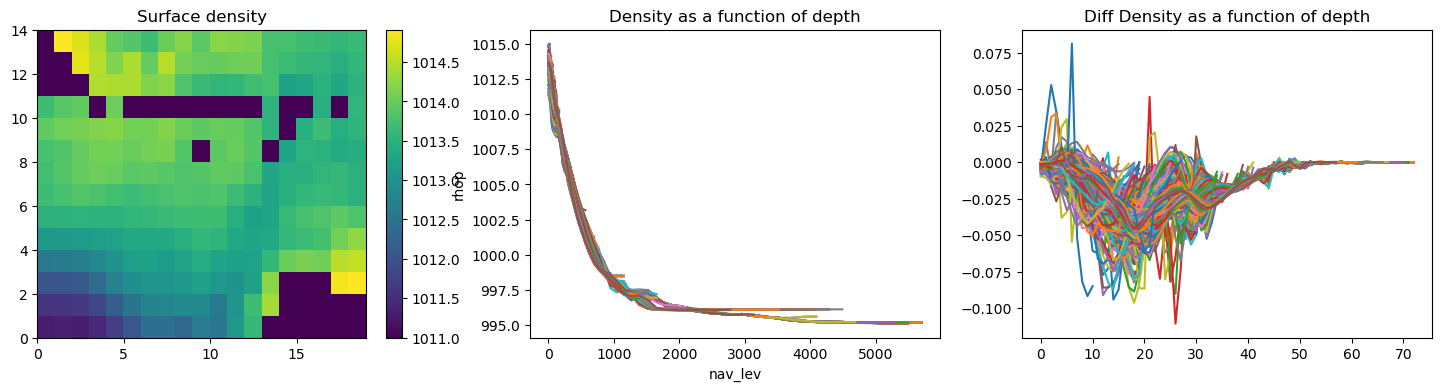

In [17]:
print("updated density")
restart.plot_density_infos(Restart,e3t_new,min_=1011)

### regularisation

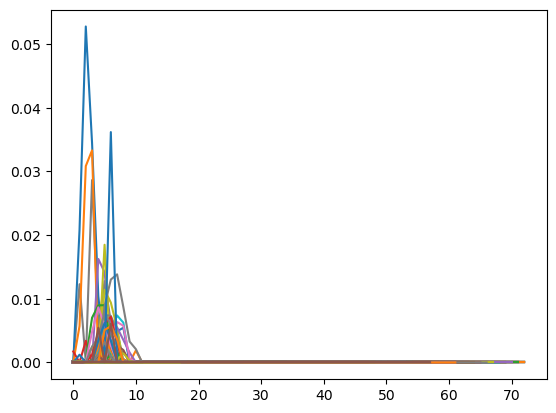

In [18]:
rhop = np.array(Restart['rhop'].where(Restart["rhop"][0] != 0., np.nan))
rhop_reg = restart.regularize_rho(np.copy(rhop))

diff_reg = np.diff(rhop_reg[0], axis=0)/e3t_new[0,:-1]
for i in range(19): 
    for j in range(14):
        plt.plot(diff_reg[:,j,i])

### 2.4 - velocities update

In [19]:
import importlib
importlib.reload(restart)

<module 'restart' from '/home/mtissot/SpinUp/jumper/lib/restart.py'>

Text(0.5, 1.0, 'Zonal U surface velocity')

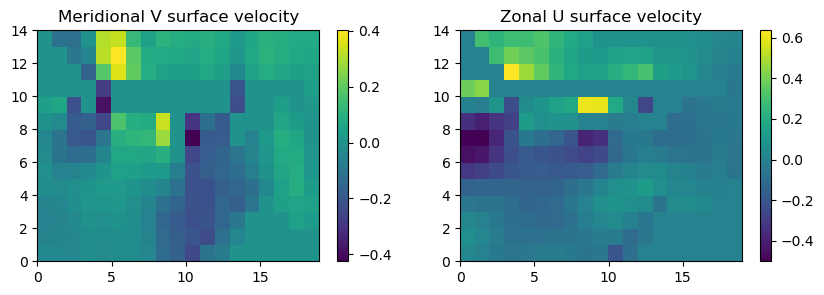

In [20]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
a = axes[0].pcolor(Restart["vn"][0,0])
axes[0].set_title('Meridional V surface velocity')
fig.colorbar(a, ax=axes[0])
a = axes[1].pcolor(Restart["un"][0,0])
fig.colorbar(a, ax=axes[1])
axes[1].set_title('Zonal U surface velocity')

In [21]:
restart.update_v_velocity(Restart,MASKdataset,e3t_new[0])
restart.update_u_velocity(Restart,MASKdataset,e3t_new[0])

(1, 75, 14, 19)
(1, 75, 14, 19)


Text(0.5, 1.0, 'Updates zonal U surface velocity')

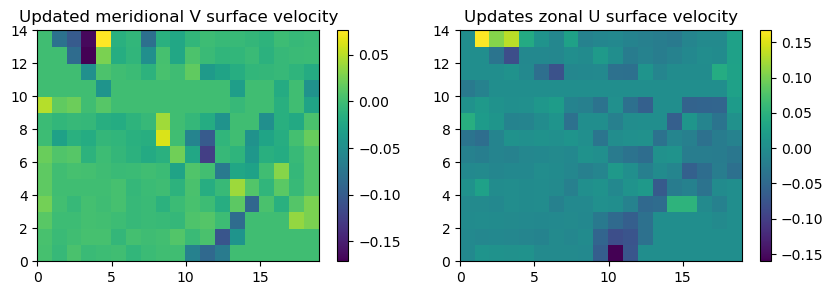

In [22]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
a = axes[0].pcolor(Restart["vn"][0,0])
axes[0].set_title('Updated meridional V surface velocity')
fig.colorbar(a, ax=axes[0])
a = axes[1].pcolor(Restart["un"][0,0])
fig.colorbar(a, ax=axes[1])
axes[1].set_title('Updates zonal U surface velocity')

# **Save restart file**

In [1]:
Restart = Restart.rename_vars({'xx': 'x','yy':'y'})             #inverse transformation of x and y vars
#Restart.to_netcdf(restarts_file+restart_name)

#hu = np.sum'(e3u_0)
#hv = sum_k(e3v_0)

#r3u(i,j) = 1/2 * ( ssh(i,j) + ssh(i+1,j ) ) / (hu(i,j)+(1-ssmask_u(i,j)))
#r3v(i,j) = 1/2 * ( ssh(i,j) + ssh(i ,j+1) ) / (hv(i,j) +(1-ssmask_v(i,j)))
#e3u=e3u_0*(1+umask(i,j,k)*r3u(i,j))
#e3v=e3v_0*(1+vmask(i,j,k)*r3v(i,j))

NameError: name 'Restart' is not defined

In [4]:
dataset1    = xr.open_dataset('/data/mtissot/infos4restart/data_restart/OCE_CM65v420-LR-CdL-pi-01_19141231_restart.nc',decode_times=False) 
mask  = xr.open_dataset('/data/mtissot/infos4restart/eORCA1.4.2_mesh_mask_modJD.nc',decode_times=False) 
dataset2    = xr.open_dataset('/data/mtissot/infos4restart/data_restart/NEW_OCE_CM65v420-LR-CdL-pi-01_19141231_restart.nc',decode_times=False) 
print("features : ", list(dataset2.keys()))

features :  ['adatrj', 'avm_k', 'avt_k', 'dissl', 'e3t_ini', 'e3t_m', 'emp_b', 'en', 'fraqsr_1lev', 'frc_s', 'frc_t', 'frc_v', 'frq_m', 'fwfisf_par_b', 'hc_loc_ini', 'isf_hc_par_b', 'isf_sc_par_b', 'kt', 'ndastp', 'nn_fsbc', 'ntime', 'qns_b', 'qsr_hc_b', 'rdt', 'rhop', 'rnf_b', 'rnf_hc_b', 'rnf_sc_b', 'sb', 'sbc_hc_b', 'sbc_sc_b', 'sc_loc_ini', 'sfx_b', 'sn', 'ssh_ini', 'ssh_m', 'sshb', 'sshn', 'sss_m', 'sst_m', 'ssu_m', 'ssv_m', 'surf_ini', 'tb', 'tmask_ini', 'tn', 'ub', 'ub2_b', 'un', 'un_bf', 'utau_b', 'vb', 'vb2_b', 'vn', 'vn_bf', 'vtau_b', 'xx', 'yy']


In [6]:
dataset1.nav_lev

<xarray.DataArray 'nav_lev' (nav_lev: 75)>
array([5.057600e-01, 1.555855e+00, 2.667682e+00, 3.856280e+00, 5.140361e+00,
       6.543034e+00, 8.092519e+00, 9.822750e+00, 1.177368e+01, 1.399104e+01,
       1.652532e+01, 1.942980e+01, 2.275762e+01, 2.655830e+01, 3.087456e+01,
       3.574020e+01, 4.118002e+01, 4.721189e+01, 5.385064e+01, 6.111284e+01,
       6.902168e+01, 7.761116e+01, 8.692943e+01, 9.704131e+01, 1.080303e+02,
       1.200000e+02, 1.330758e+02, 1.474062e+02, 1.631645e+02, 1.805499e+02,
       1.997900e+02, 2.211412e+02, 2.448906e+02, 2.713564e+02, 3.008875e+02,
       3.338628e+02, 3.706885e+02, 4.117939e+02, 4.576256e+02, 5.086399e+02,
       5.652923e+02, 6.280260e+02, 6.972587e+02, 7.733683e+02, 8.566790e+02,
       9.474479e+02, 1.045854e+03, 1.151991e+03, 1.265861e+03, 1.387377e+03,
       1.516364e+03, 1.652568e+03, 1.795671e+03, 1.945296e+03, 2.101027e+03,
       2.262422e+03, 2.429025e+03, 2.600380e+03, 2.776039e+03, 2.955570e+03,
       3.138565e+03, 3.324641e+03, 3.513446e+03, 3.704657e+03, 3.897982e+03,
       4.093159e+03, 4.289953e+03, 4.488155e+03, 4.687581e+03, 4.888070e+03,
       5.089479e+03, 5.291683e+03, 5.494575e+03, 5.698061e+03, 5.902058e+03],
      dtype=float32)
Coordinates:
  * nav_lev  (nav_lev) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03

(1, 331, 360)


ValueError: For X (361) and Y (332) with flat shading, A should have shape (331, 360, 3) or (331, 360, 4) or (331, 360) or (119160,), not (331, 360, 75)

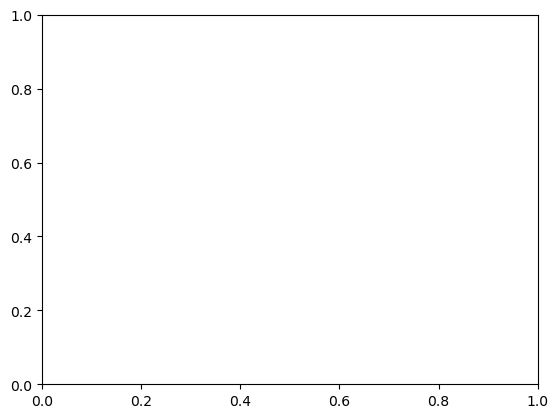

In [12]:
print(np.shape(dataset1.e3t_m))
plt.pcolor(dataset1.e3t_m[0].where(mask.e3t_0[0,0]),vmin=1)
plt.colorbar()

(1, 331, 360)


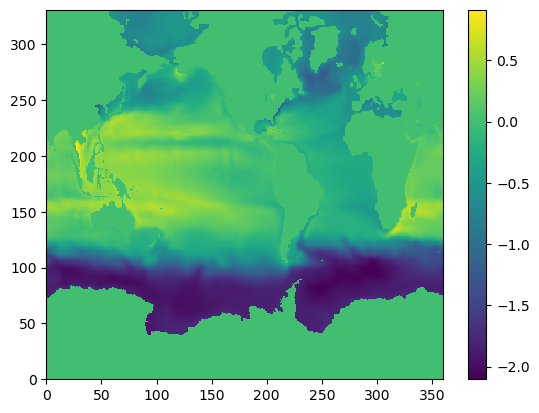

In [15]:
print(np.shape(dataset1.e3t_m))
plt.pcolor(dataset1.ssh_m[0])
plt.colorbar()

/tmp/ipykernel_566325/2495800767.py:4: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


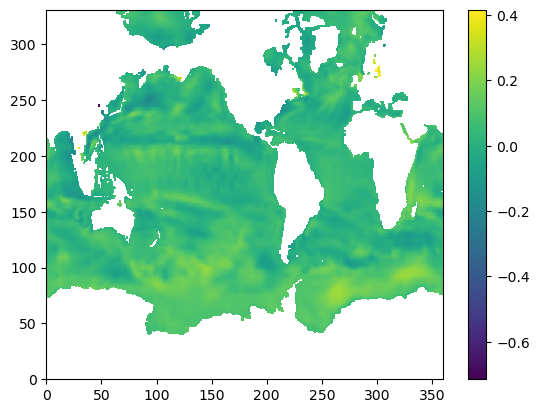

In [16]:
np.shape(dataset2.rhop)
diff = dataset1.ssh_m[0]-dataset2.ssh_m[0]
plt.pcolor(diff.where(mask.vmask[0,20]))
plt.colorbar()

In [7]:
def plot_density_infos(array,min_=1017):
    """
    Plot density (rhop) information: surface density, density as a function of depth, and the difference in density as a function of depth. 
    The difference provides insights into density errors, particularly where it decreases instead of increasing

    Parameters:
        array (xarray.Dataset) : Restart file contains density informations
        e3t_new (numpy.array)  : Array representing the new z-axis cell thickness : the distance between two grid points.
        min_ (float, optional) : Minimum value for color scale. Defaults to 1017.

    Returns:
        None
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    a = axes[0].pcolor(array["rhop"][0,0],vmin=min_)
    fig.colorbar(a, ax=axes[0])
    
    rhop = array['rhop'].where(array["rhop"][0] != 0., np.nan)
    diff_rhop = np.diff(rhop.isel(time_counter=0), axis=0) 
    
    for i in range(array["rhop"].sizes['x']): 
        for j in range(array["rhop"].sizes['y']):
            rhop.isel(time_counter=0, x=i, y=j).plot(ax=axes[1])     
            axes[2].plot(diff_rhop[:,j,i])  
            
    axes[0].set_title('Surface density')
    axes[1].set_title('Density as a function of depth')
    axes[2].set_title('Diff Density as a function of depth')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


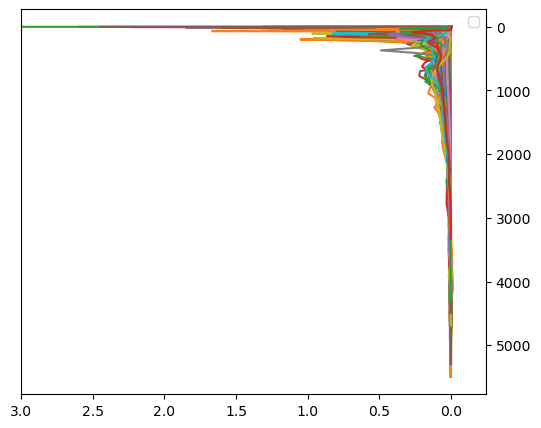

In [28]:
rhop1 = dataset1['rhop'].where(dataset1["rhop"][0] != 0., np.nan)
diff_rhop1 = np.diff(rhop1.isel(time_counter=0), axis=0) 
down1 = np.sum(diff_rhop1 < 0)


fig = plt.figure(figsize=(6, 5))
ax = plt.gca()

for i in range(0,dataset1["rhop"].sizes['x'],15):
    for j in range(0,dataset1["rhop"].sizes['y'],15):
        if not np.isnan(diff_rhop1[:30, j, i]).any():
            l = len(diff_rhop1[:,j,i])
            ax.plot(diff_rhop1[:,j,i],dataset1.nav_lev[:l])
ax.invert_yaxis()
ax.invert_xaxis()

ax.set_xlim(left=3)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


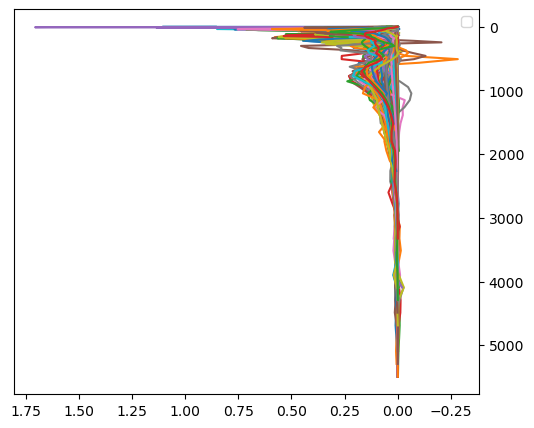

In [30]:
rhop2 = dataset2['rhop'].where(dataset2["rhop"][0] != 0., np.nan)
diff_rhop2 = np.diff(rhop2.isel(time_counter=0), axis=0) 
down2 = np.sum(diff_rhop2 < 0)


fig = plt.figure(figsize=(6, 5))
ax = plt.gca()

for i in range(0,dataset2["rhop"].sizes['x'],15):
    for j in range(0,dataset2["rhop"].sizes['y'],15):
        if not np.isnan(diff_rhop2[:30, j, i]).any():
            l = len(diff_rhop2[:,j,i])
            ax.plot(diff_rhop2[:,j,i],dataset2.nav_lev[:l])
ax.invert_yaxis()
ax.invert_xaxis()

#ax.set_xlim(left=2)

ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.legend()
plt.show()

In [55]:
dataset2["rhop"].sizes['x']*dataset2["rhop"].sizes['y']*75

8937000

In [49]:
down2

94068

In [43]:
if not np.isnan(diff_rhop2[:, j, i]).any():
    print(diff_rhop2[:,j,i])

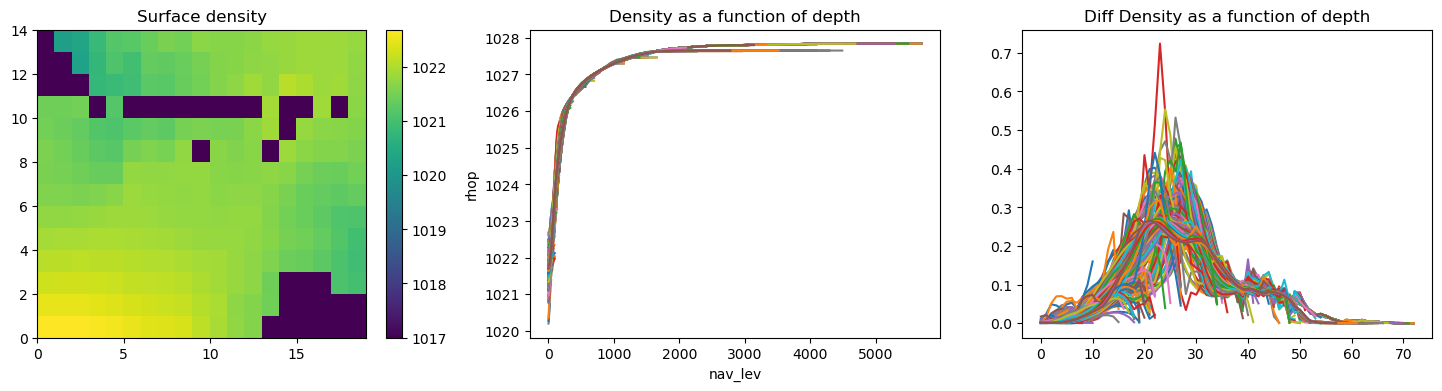

In [ ]:
plot_density_infos(dataset2)

----